Loading libraries

In [16]:
import pandas as pd

In [17]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [18]:
train_data.head()

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,ID_3CFL0U,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,...,Never had,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had,Low
1,ID_XWI7G3,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,...,NaN,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN,Medium
2,ID_TY93LV,malawi,34.0,Don’t know or N/A,No,No,Don't know,Yes,30000.0,6000.0,...,Never had,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Low
3,ID_9OP2C8,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,...,Never had,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now,Low
4,ID_13REYS,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,...,NaN,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN,Low


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-null   object 
 7   perception_cannot_afford_insuranc

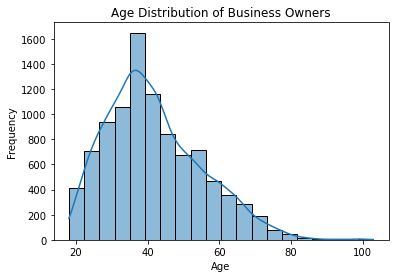

In [20]:
#plot age distributions of the country's business owners using a histogram
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['owner_age'], bins=20, kde=True)
plt.title('Age Distribution of Business Owners')        
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


No handles with labels found to put in legend.


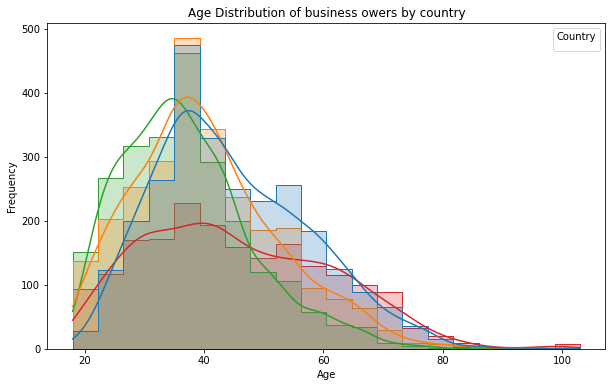

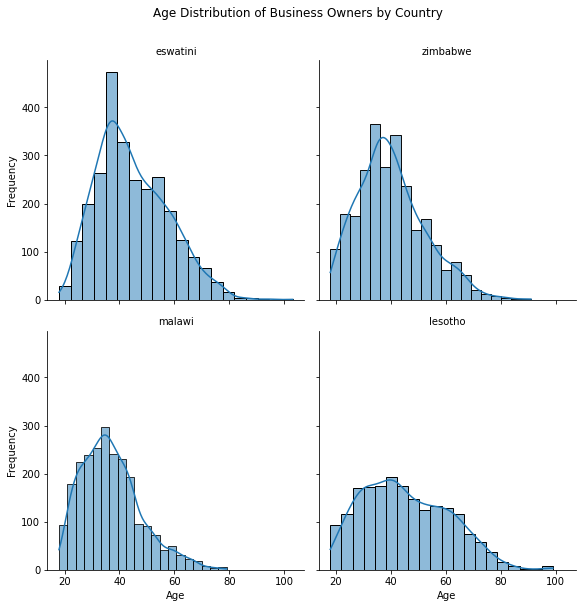

In [21]:
# compare the four countries
plt.figure(figsize=(10, 6))
sns.histplot(
    data= train_data,
    x ='owner_age',
    hue='country',
    bins=20,
    kde=True,
    element = 'step',
    stat= 'count',
    legend= True
)

plt.title('Age Distribution of business owers by country')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Country');


g = sns.FacetGrid(
    train_data,
    col='country',
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

g.map(sns.histplot, 'owner_age', bins=20, kde=True)
g.set_axis_labels('Age', 'Frequency')
g.set_titles('{col_name}')
plt.suptitle('Age Distribution of Business Owners by Country', y=1.05)

plt.show()

Distribution of business age per country

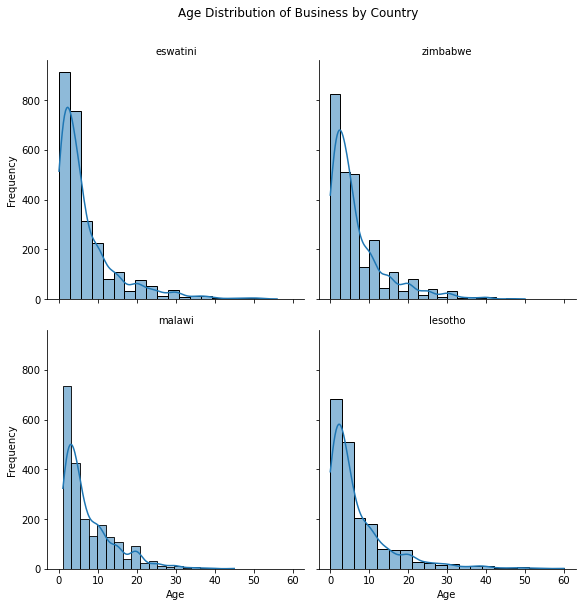

In [22]:
g = sns.FacetGrid(
    train_data,
    col='country',
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

g.map(sns.histplot, 'business_age_years', bins=20, kde=True)
g.set_axis_labels('Age', 'Frequency')
g.set_titles('{col_name}')
plt.suptitle('Age Distribution of Business by Country', y=1.05)

plt.show()

In [23]:
#plot the FHI by the business age 
train_data['Target'].value_counts()

Low       6280
Medium    2868
High       470
Name: Target, dtype: int64

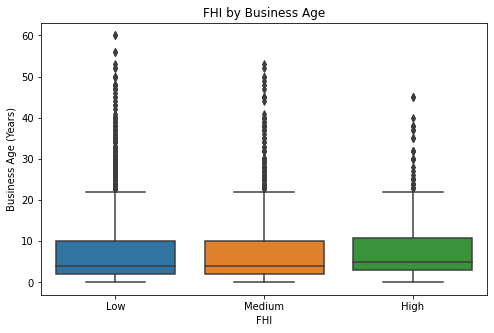

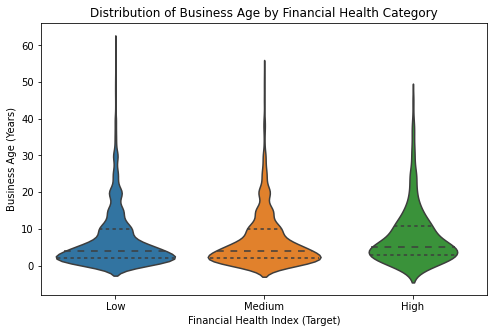

In [24]:
plt.figure(figsize = (8,5))

sns.boxplot(
    data = train_data,
    x= 'Target',
    y = 'business_age_years'
)

plt.title('FHI by Business Age')
plt.xlabel('FHI')
plt.ylabel('Business Age (Years)')  
plt.show()


plt.figure(figsize=(8, 5))
sns.violinplot(
    data=train_data,
    x='Target',
    y='business_age_years',
    inner='quartile'
)

plt.title('Distribution of Business Age by Financial Health Category')
plt.xlabel('Financial Health Index (Target)')
plt.ylabel('Business Age (Years)')
plt.show()

### 1. Inspect the Traget class for imbalance and distribution

In [25]:
train_data['Target'].value_counts(sort=True)

Low       6280
Medium    2868
High       470
Name: Target, dtype: int64

### Numerical Features Analysis 


NUMERICAL FEATURES ANALYSIS

Numerical Features (6):
['owner_age', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'business_age_months']

Statistical Summary:
         owner_age  personal_income  business_expenses  business_turnover  \
count  9618.000000     9.509000e+03       9.389000e+03       9.402000e+03   
mean     41.705344     2.627345e+05       4.583838e+05       1.348210e+06   
std      13.314010     2.566268e+06       6.184746e+06       8.804741e+06   
min      18.000000     0.000000e+00       0.000000e+00       0.000000e+00   
25%      32.000000     3.000000e+02       7.000000e+02       1.500000e+03   
50%      40.000000     2.000000e+03       3.000000e+03       6.000000e+03   
75%      50.000000     2.500000e+04       2.500000e+04       5.000000e+04   
max     103.000000     1.500000e+08       5.000000e+08       4.200000e+08   

       business_age_years  business_age_months  
count         9366.000000          5507.000000  
mean        

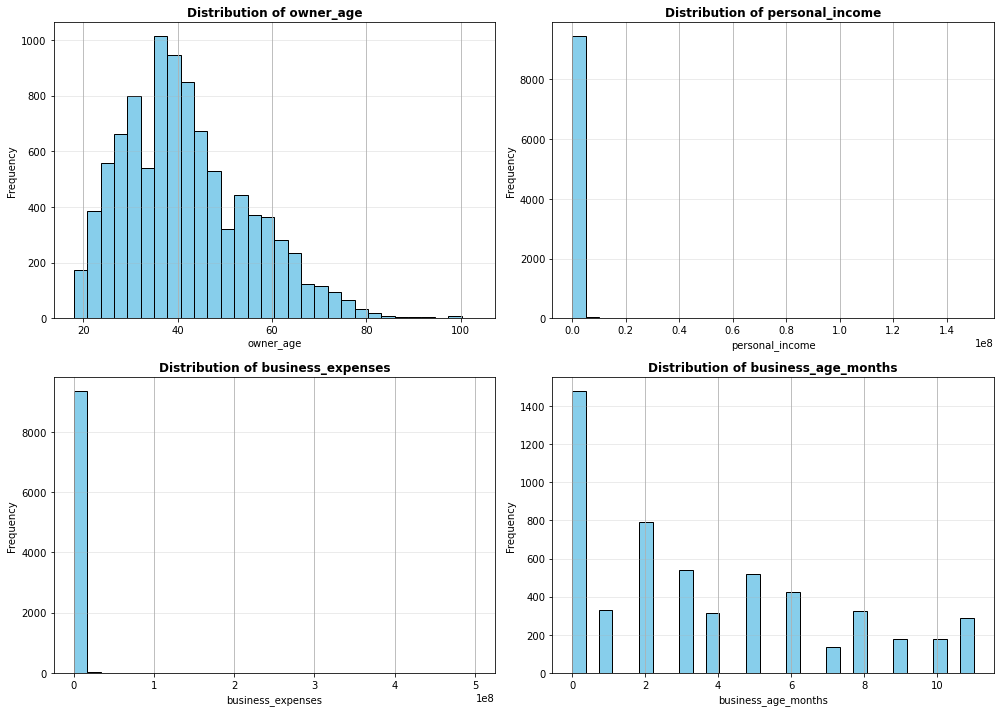

In [27]:
# ========================================
# 5. NUMERICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

print(f"\nNumerical Features ({len(numerical_cols)}):")
print(numerical_cols)

# Statistical summary
print("\nStatistical Summary:")
print(train_data[numerical_cols].describe())

# Visualize distributions of key numerical features
key_numerical = ['owner_age', 'personal_income', 'business_expenses', 'business_age_months']
available_numerical = [col for col in key_numerical if col in train_data.columns]
if available_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(available_numerical[:4]):
        train_data[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Categorical Variables Analysis 


In [28]:
# ========================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

print(f"\nCategorical Features ({len(categorical_cols)}):")
print(categorical_cols)

# Cardinality analysis
print("\nCardinality (Unique Values) for Categorical Features:")
cardinality_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Unique_Values': [train_data[col].nunique() for col in categorical_cols]
}).sort_values('Unique_Values', ascending=False)
print(cardinality_df.to_string(index=False))


CATEGORICAL FEATURES ANALYSIS

Categorical Features (32):
['country', 'attitude_stable_business_environment', 'attitude_worried_shutdown', 'compliance_income_tax', 'perception_insurance_doesnt_cover_losses', 'perception_cannot_afford_insurance', 'motor_vehicle_insurance', 'has_mobile_money', 'current_problem_cash_flow', 'has_cellphone', 'owner_sex', 'offers_credit_to_customers', 'attitude_satisfied_with_achievement', 'has_credit_card', 'keeps_financial_records', 'perception_insurance_companies_dont_insure_businesses_like_yours', 'perception_insurance_important', 'has_insurance', 'covid_essential_service', 'attitude_more_successful_next_year', 'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account', 'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock', 'medical_insurance', 'funeral_insurance', 'motivation_make_more_money', 'uses_friends_family_savings', 'uses_informal_lender', 'Target']

Cardinality (Unique Values) for Categorical Features:
              

### Binary/ Categorical Features Analysis

In [29]:
# ========================================
# 8. BINARY/CATEGORICAL FEATURE PATTERNS
# ========================================

print("\n" + "=" * 60)
print("BINARY & CATEGORICAL PATTERNS")
print("=" * 60)

# Analyze Yes/No columns
yes_no_cols = [col for col in categorical_cols if 
               train_data[col].dropna().isin(['Yes', 'No', "Don't know or N/A"]).any()]

print(f"\nYes/No Type Columns ({len(yes_no_cols)}):")
for col in yes_no_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(train_data[col].value_counts())


BINARY & CATEGORICAL PATTERNS

Yes/No Type Columns (19):

attitude_stable_business_environment:
Yes                  5820
No                   2451
Don’t know or N/A    1345
Name: attitude_stable_business_environment, dtype: int64

attitude_worried_shutdown:
No                   5804
Yes                  3575
Don’t know or N/A     237
Name: attitude_worried_shutdown, dtype: int64

compliance_income_tax:
No            8010
Yes           1252
Don’t know     341
Refused         11
Name: compliance_income_tax, dtype: int64

perception_insurance_doesnt_cover_losses:
No            4486
Yes           2604
Don't know    2523
Name: perception_insurance_doesnt_cover_losses, dtype: int64

perception_cannot_afford_insurance:
Yes           6056
No            2093
Don't know    1464
Name: perception_cannot_afford_insurance, dtype: int64


### FEATURE-PILLAR MAPPING 
Savings & Assets:
- business_turnover
- personal_income
- keeps_financial_records

Debt & Repayment:
- has_loan_account
- current_problem_cash_flow
- problem_sourcing_money

Resilience to Shocks:
- has_insurance
- medical_insurance
- funeral_insurance
- future_risk_theft_stock

Access to Finance:
- has_mobile_money
- has_debit_card
- has_credit_card
- has_internet_banking
